<a href="https://colab.research.google.com/github/ryandale7/ML-on-Graphs/blob/main/10_Introduction_to_Graph_Neural_Networks_(GNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Automated Download and Extraction

In this approach, we will:
- Mount Google Drive.
- Create (or navigate to) a "Data" subfolder under "Colab Notebooks".
- Use `curl` to download the compressed file (`web-NotreDame.txt.gz`) from the repository.
- Extract the file using `gunzip`.
- Verify the extracted file.
- Load and inspect the dataset.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p "/content/drive/MyDrive/Colab Notebooks/Data"
%cd "/content/drive/MyDrive/Colab Notebooks/Data"

!curl -O https://snap.stanford.edu/data/web-NotreDame.txt.gz
!gunzip web-NotreDame.txt.gz
!ls -lh

# Load and verify the dataset by printing the first 10 lines
with open("web-NotreDame.txt", "r") as file:
    for _ in range(10):
        print(file.readline().strip())


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3621k  100 3621k    0     0  1953k      0  0:00:01  0:00:01 --:--:-- 1952k
total 223M
-rw------- 1 root root 5.1M Feb  7 09:36 ca-AstroPh.txt
-rw------- 1 root root 6.4M Jan 10 19:22 cit-HepPh.txt
-rw------- 1 root root 5.4M Feb  7 09:02 cit-HepTh.txt
-rw------- 1 root root 1.1M Jan 16 12:52 CollegeMsg.txt
-rw------- 1 root root  13M Jan 10 18:46 com-amazon.ungraph.txt
-rw------- 1 root root 1.1M Jan 16 18:57 com-lj.top5000.cmty.txt
-rw------- 1 root root 7.5M Jan 10 19:22 com-orkut.top5000.cmty.txt
drwx------ 2 root root 4.0K Jan  6 14:56 congress_network
-rw------- 1 root root 190K Jan 16 10:36 congress_network.zip
drwx------ 2 root root 4.0K Jan 10 19:12 deezer_ego_nets
-rw------- 1 root root 189K Jan 16 10:47 email-Eu-core.txt
drwx------ 2 root root 4.0K

## Manual Upload Instructions

If the automated method is not feasible or you prefer manual steps, follow these instructions:
- Download the file from [this link](https://snap.stanford.edu/data/web-NotreDame.txt.gz) to your local machine.
- Extract the file locally (e.g., right-click and unzip, or use `gunzip` on macOS/Linux) to obtain `web-NotreDame.txt`.
- In your Google Drive, create or navigate to the "Colab Notebooks/Data" folder.
- Upload the extracted file (`web-NotreDame.txt`) into that Data subfolder.
- Open (or create) a Colab notebook.
- Mount your Google Drive and change the directory to the Data folder using the code below.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Colab Notebooks/Data"

# Load and verify the manually uploaded dataset by printing the first 10 lines
with open("web-NotreDame.txt", "r") as file:
    for _ in range(10):
        print(file.readline().strip())


## Dataset Information

**University of Notre Dame Web Graph (1999)**

- **Description:**  
  Nodes represent pages from the University of Notre Dame (domain nd.edu), and directed edges represent hyperlinks between them. The data was collected in 1999 by Albert, Jeong, and Barabasi.

- **Dataset Statistics:**
  - **Nodes:** 325,729
  - **Edges:** 1,497,134
  - **Nodes in largest WCC:** 325,729 (1.000)
  - **Edges in largest WCC:** 1,497,134 (1.000)
  - **Nodes in largest SCC:** 53,968 (0.166)
  - **Edges in largest SCC:** 304,685 (0.204)
  - **Average clustering coefficient:** 0.2346
  - **Number of triangles:** 8,910,005
  - **Fraction of closed triangles:** 0.03104
  - **Diameter (longest shortest path):** 46
  - **90-percentile effective diameter:** 9.4

- **Source (citation):**  
  R. Albert, H. Jeong, A.-L. Barabasi. Diameter of the World-Wide Web. *Nature*, 1999.

- **File:**  
  `web-NotreDame.txt.gz` – University of Notre Dame web graph from 1999.


## Running black Code

The following code runs Black via nbQA on all notebooks in the current directory.


In [10]:
# Running black

from google.colab import drive

!pip install nbqa black

!nbqa black .


No notebooks found in given path(s)


## Section 1: Overview of Graph Neural Networks and Their Motivation


### Objectives
- Understand the concept and importance of Graph Neural Networks (GNNs).
- Recognize the advantages of leveraging graph structure in learning tasks.


### Introduction
Graph Neural Networks (GNNs) are designed to process data represented as graphs. Unlike traditional neural networks that operate on Euclidean data, GNNs take advantage of the inherent structure of graphs—nodes, edges, and their relationships—to capture complex dependencies. This section introduces the fundamental ideas behind GNNs and explains why graphs are a natural data format for many real-world problems.


### Key Points
- Graphs capture complex relationships and dependencies between entities.
- GNNs leverage node connectivity and overall graph structure to learn rich feature representations.
- Using GNNs can improve performance in tasks where data is non-Euclidean, such as social network analysis, recommendation systems, and web page ranking.


### Code Examples
Below is an example that demonstrates how to load the University of Notre Dame web graph dataset, visualize its structure, and plot the node degree distribution using NetworkX and matplotlib.


Graph Loaded: Nodes = 325729 Edges = 1497134


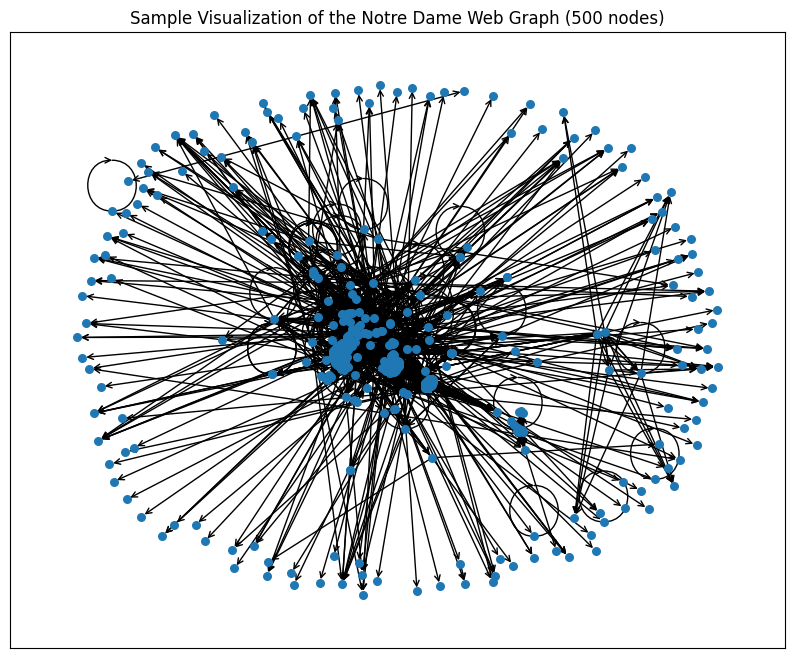

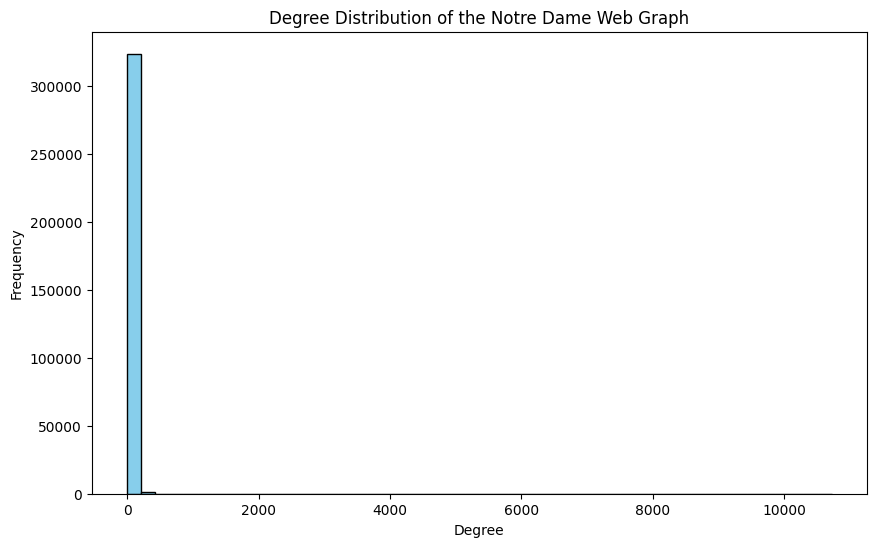

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the Notre Dame web graph dataset as a directed graph.
G = nx.read_edgelist("web-NotreDame.txt", create_using=nx.DiGraph(), nodetype=int, comments='#')
print("Graph Loaded: Nodes =", G.number_of_nodes(), "Edges =", G.number_of_edges())

# Visualize a small portion of the graph for clarity (sample 500 nodes)
sample_nodes = list(G.nodes())[:500]
G_sample = G.subgraph(sample_nodes).copy()

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sample, seed=42)  # Fixed seed for reproducibility
nx.draw_networkx(G_sample, pos, node_size=30, arrowstyle='->', arrowsize=10, with_labels=False)
plt.title("Sample Visualization of the Notre Dame Web Graph (500 nodes)")
plt.show()

# Plot the degree distribution for the full graph
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='skyblue', edgecolor='black')
plt.title("Degree Distribution of the Notre Dame Web Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


### Observations & Explanations
- The sample graph visualization provides an overview of the connectivity patterns and sparsity within the dataset.
- The degree distribution plot shows how connectivity varies among nodes, with some nodes having significantly higher degrees than others. This indicates the presence of hub nodes.
- Understanding these patterns is crucial when designing GNN architectures, as the graph structure directly influences how node features are aggregated and updated.


### Quiz
1. What is a Graph Neural Network (GNN) and why is it beneficial for graph-structured data?  
2. How does graph structure enhance learning in GNNs compared to traditional neural networks?


### Practical Activities
- **Activity 1:** Load the Notre Dame web graph dataset and compute basic statistics (total number of nodes and edges).  
- **Activity 2:** Visualize the graph structure by sampling a subset of nodes and plotting the degree distribution.


Total number of nodes: 325729
Total number of edges: 1497134


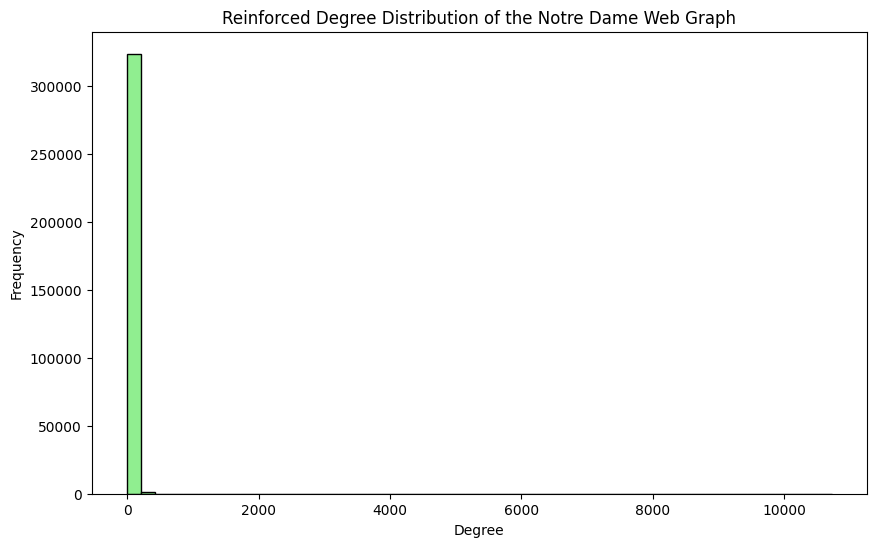

In [4]:
# Practical Activity: Compute and visualize basic statistics

# Compute basic statistics for the full graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Total number of nodes:", num_nodes)
print("Total number of edges:", num_edges)

# Visualize degree distribution again (for reinforcement)
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='lightgreen', edgecolor='black')
plt.title("Reinforced Degree Distribution of the Notre Dame Web Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


### Explanation/Feedback
The code above demonstrates how to load the University of Notre Dame web graph dataset, visualize a sample of its structure, and analyze its degree distribution. These steps are essential for understanding the graph's properties, which is a crucial prerequisite for designing effective Graph Neural Networks. Try modifying the sample size in the visualization or experimenting with different layout algorithms to gain further insights into the graph structure.


## Section 2: Message Passing Mechanism in GNNs


### Objectives
- Understand the concept of message passing in GNNs.
- Learn how information is aggregated from neighbors in a graph.


### Introduction
Message passing is a core mechanism in Graph Neural Networks (GNNs) where nodes exchange information with their neighbors. Through iterative aggregation, each node updates its feature representation based on the features of adjacent nodes. This local aggregation enables the network to capture structural information from the graph and build richer node embeddings.


### Key Points
- Neighbors share information to update node features.
- The message passing process is iterative and acts as a local aggregation scheme.
- Iterative message passing allows nodes to incorporate information from increasingly larger portions of the graph.


### Code Examples
Below is an example that simulates a simple message passing step on a toy graph. In this simulation, each node starts with an initial feature value, and at each iteration, a node updates its feature by averaging the features of its neighbors.


Initial Features:
Node 0: 0.42
Node 1: 0.46
Node 2: 0.41
Node 3: 0.30
Node 4: 0.43

After iteration 1:
Node 0: 0.44
Node 1: 0.38
Node 2: 0.44
Node 3: 0.46
Node 4: 0.41

After iteration 2:
Node 0: 0.41
Node 1: 0.45
Node 2: 0.41
Node 3: 0.38
Node 4: 0.44

After iteration 3:
Node 0: 0.43
Node 1: 0.40
Node 2: 0.43
Node 3: 0.45
Node 4: 0.41

After iteration 4:
Node 0: 0.41
Node 1: 0.43
Node 2: 0.41
Node 3: 0.40
Node 4: 0.43

After iteration 5:
Node 0: 0.42
Node 1: 0.41
Node 2: 0.43
Node 3: 0.43
Node 4: 0.41


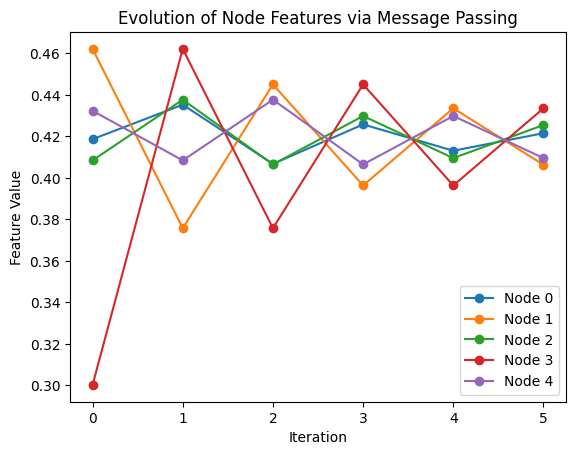

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a toy undirected graph with 5 nodes
G_toy = nx.Graph()
G_toy.add_edges_from([
    (0, 1), (0, 2), (1, 2), (1, 3), (2, 4)
])

# Assign initial feature values to each node (e.g., scalar values)
initial_features = {node: np.random.rand() for node in G_toy.nodes()}
print("Initial Features:")
for node, feat in initial_features.items():
    print(f"Node {node}: {feat:.2f}")

# Function to perform one round of message passing (mean aggregator)
def message_passing(G, features):
    new_features = {}
    for node in G.nodes():
        neighbor_feats = [features[neigh] for neigh in G.neighbors(node)]
        if neighbor_feats:  # if the node has neighbors
            new_features[node] = np.mean(neighbor_feats)
        else:
            new_features[node] = features[node]
    return new_features

# Perform iterative message passing for a few iterations
num_iterations = 5
features_history = [initial_features]
current_features = initial_features

for i in range(num_iterations):
    current_features = message_passing(G_toy, current_features)
    features_history.append(current_features)
    print(f"\nAfter iteration {i+1}:")
    for node, feat in current_features.items():
        print(f"Node {node}: {feat:.2f}")

# Visualization: Plot the evolution of node features over iterations
iterations = list(range(num_iterations + 1))
for node in G_toy.nodes():
    node_feature_values = [features_history[it][node] for it in iterations]
    plt.plot(iterations, node_feature_values, marker='o', label=f"Node {node}")
plt.xlabel("Iteration")
plt.ylabel("Feature Value")
plt.title("Evolution of Node Features via Message Passing")
plt.legend()
plt.show()


### Observations & Explanations
- The toy graph simulation shows that each node's feature is updated by averaging the features of its neighbors.
- As iterations increase, the features tend to converge, reflecting the diffusion of information across the graph.
- This iterative process allows nodes to gradually incorporate information from a broader neighborhood, thereby enhancing their feature representation.


### Quiz
1. What is the role of message passing in Graph Neural Networks (GNNs)?
2. How does iterative message passing improve node representations?


### Practical Activities
- **Activity 1:** Implement a message passing algorithm on a different toy graph (with at least 7 nodes) and observe how the node features evolve over multiple iterations.
- **Activity 2:** Modify the aggregation function from mean to sum and compare how the node features update with each iteration.


Initial Features (Large Graph):
Node 0: 1.00
Node 1: 0.47
Node 2: 0.01
Node 3: 0.51
Node 4: 0.29
Node 5: 0.66
Node 6: 0.40

Iteration 1 (Sum Aggregator):
Node 0: 0.48
Node 1: 1.52
Node 2: 1.75
Node 3: 1.41
Node 4: 0.92
Node 5: 0.51
Node 6: 0.29

Iteration 2 (Sum Aggregator):
Node 0: 3.27
Node 1: 3.65
Node 2: 2.91
Node 3: 2.95
Node 4: 3.45
Node 5: 1.41
Node 6: 0.92

Iteration 3 (Sum Aggregator):
Node 0: 6.56
Node 1: 9.13
Node 2: 10.37
Node 3: 8.51
Node 4: 6.78
Node 5: 2.95
Node 6: 3.45

Iteration 4 (Sum Aggregator):
Node 0: 19.50
Node 1: 25.44
Node 2: 22.48
Node 3: 18.87
Node 4: 22.33
Node 5: 8.51
Node 6: 6.78

Iteration 5 (Sum Aggregator):
Node 0: 47.92
Node 1: 60.85
Node 2: 67.28
Node 3: 56.29
Node 4: 48.13
Node 5: 18.87
Node 6: 22.33


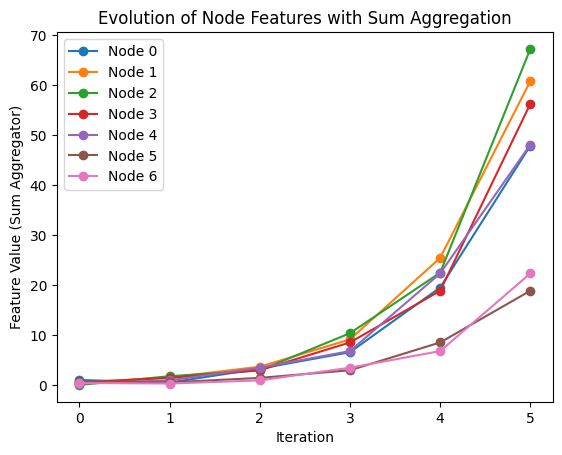

In [6]:
# Practical Activity: Message Passing on a Larger Toy Graph
# Create a toy graph with 7 nodes
G_toy_large = nx.Graph()
G_toy_large.add_edges_from([
    (0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 6)
])

# Initialize features for the larger graph
initial_features_large = {node: np.random.rand() for node in G_toy_large.nodes()}
print("Initial Features (Large Graph):")
for node, feat in initial_features_large.items():
    print(f"Node {node}: {feat:.2f}")

# Define a message passing function with sum aggregator
def message_passing_sum(G, features):
    new_features = {}
    for node in G.nodes():
        neighbor_feats = [features[neigh] for neigh in G.neighbors(node)]
        if neighbor_feats:
            new_features[node] = np.sum(neighbor_feats)
        else:
            new_features[node] = features[node]
    return new_features

# Run message passing with sum aggregator for 5 iterations
num_iterations = 5
features_history_large = [initial_features_large]
current_features_large = initial_features_large

for i in range(num_iterations):
    current_features_large = message_passing_sum(G_toy_large, current_features_large)
    features_history_large.append(current_features_large)
    print(f"\nIteration {i+1} (Sum Aggregator):")
    for node, feat in current_features_large.items():
        print(f"Node {node}: {feat:.2f}")

# Visualize the evolution of node features with sum aggregator
iterations = list(range(num_iterations + 1))
for node in G_toy_large.nodes():
    node_feature_values = [features_history_large[it][node] for it in iterations]
    plt.plot(iterations, node_feature_values, marker='o', label=f"Node {node}")
plt.xlabel("Iteration")
plt.ylabel("Feature Value (Sum Aggregator)")
plt.title("Evolution of Node Features with Sum Aggregation")
plt.legend()
plt.show()


### Explanation/Feedback
The above practical activity extends the message passing simulation to a larger toy graph using a sum aggregator. By comparing the mean and sum aggregation methods, learners can observe the impact of different aggregation strategies on the evolution of node features. Experiment with additional aggregation functions and varying the number of iterations to further explore message passing dynamics.


## Section 3: Graph Convolutional Networks (GCNs)


### Objectives
- Learn the principles behind graph convolution.
- Understand how GCNs extend traditional convolutional operations to graphs.


### Introduction
Graph Convolutional Networks (GCNs) apply convolutional operations to graph data by aggregating features from neighboring nodes. This section covers the mathematical formulation of graph convolutions, discusses the differences between spectral and spatial approaches, and demonstrates the construction and training of a simple GCN model using the University of Notre Dame web graph dataset.


### Key Points
- Graph convolution aggregates features from local neighborhoods using normalized adjacency.
- GCNs can be implemented using either spectral or spatial methods.
- Stacking multiple GCN layers allows the model to capture higher-order neighborhood information.


### Code Examples
The following code demonstrates how to:
- Load a subgraph of the Notre Dame web graph.
- Create a feature matrix using degree centrality as a simple node feature.
- Construct and train a simple 2-layer GCN model using PyTorch.
- Visualize the learned node embeddings with PCA.


Subgraph: Nodes = 1000 Edges = 3407
Epoch 20/100, Loss: 0.6419, Accuracy: 0.7520
Epoch 40/100, Loss: 0.5821, Accuracy: 0.7570
Epoch 60/100, Loss: 0.5390, Accuracy: 0.7770
Epoch 80/100, Loss: 0.5066, Accuracy: 0.7990
Epoch 100/100, Loss: 0.4804, Accuracy: 0.8130


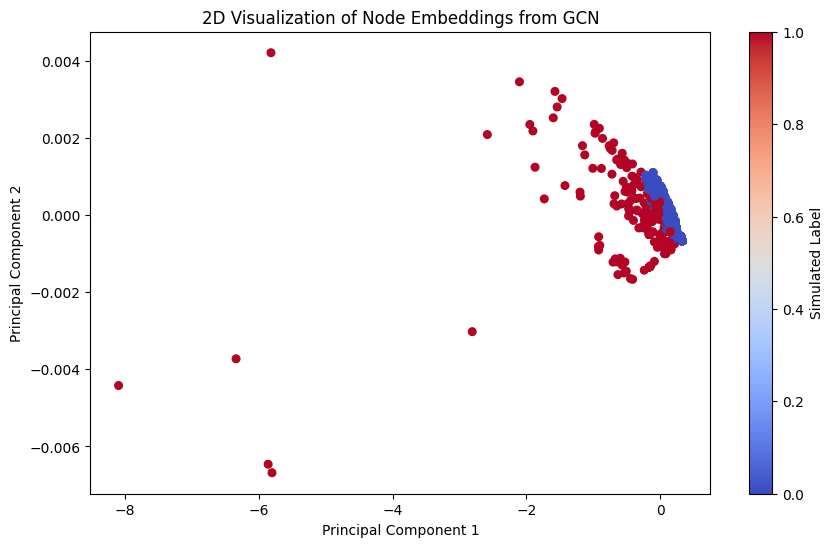

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Notre Dame web graph dataset as a directed graph,
# then create a subgraph with the first 1000 nodes for faster execution.
G = nx.read_edgelist("web-NotreDame.txt", create_using=nx.DiGraph(), nodetype=int, comments='#')
sub_nodes = list(G.nodes())[:1000]
G_sub = G.subgraph(sub_nodes).to_undirected()  # Convert to undirected for GCNs
print("Subgraph: Nodes =", G_sub.number_of_nodes(), "Edges =", G_sub.number_of_edges())

# Create a feature matrix: use degree centrality as a single feature for each node.
deg_cent = nx.degree_centrality(G_sub)
features = np.array([[deg_cent[node]] for node in sub_nodes], dtype=np.float32)
X = torch.tensor(features)  # Shape: [num_nodes, 1]

# Simulate binary labels: assign label 1 if degree centrality is above the median, else 0.
median_deg = np.median([deg_cent[node] for node in sub_nodes])
labels = np.array([1 if deg_cent[node] > median_deg else 0 for node in sub_nodes], dtype=np.int64)
y = torch.tensor(labels)

# Build the adjacency matrix for the subgraph.
A = nx.adjacency_matrix(G_sub, nodelist=sub_nodes).astype(np.float32)
A = A.todense()
A = np.array(A)
A = torch.tensor(A)

# Add self-loops: A_hat = A + I
I = torch.eye(A.shape[0])
A_hat = A + I

# Compute the degree matrix D_hat and its inverse square root.
D_hat = torch.diag(torch.sum(A_hat, dim=1))
D_hat_inv_sqrt = torch.inverse(torch.sqrt(D_hat))

# Compute the normalized adjacency matrix: A_norm = D^(-1/2) * A_hat * D^(-1/2)
A_norm = torch.matmul(torch.matmul(D_hat_inv_sqrt, A_hat), D_hat_inv_sqrt)

# Define a simple GCN layer.
class GCNLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, X, A_norm):
        out = torch.matmul(A_norm, X)
        out = self.linear(out)
        return out

# Define a simple 2-layer GCN model.
class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass):
        super(GCN, self).__init__()
        self.gcn1 = GCNLayer(nfeat, nhid)
        self.gcn2 = GCNLayer(nhid, nclass)
    def forward(self, X, A_norm):
        h = self.gcn1(X, A_norm)
        h = F.relu(h)
        h = self.gcn2(h, A_norm)
        return h, h  # Return both final output and intermediate embeddings

# Set model parameters.
nfeat = X.shape[1]  # 1 feature per node
nhid = 16
nclass = 2

model = GCN(nfeat, nhid, nclass)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop for the GCN.
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output, embeddings = model(X, A_norm)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        _, predicted = torch.max(output, 1)
        correct = (predicted == y).sum().item()
        acc = correct / len(y)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

# Visualize the learned node embeddings using PCA.
model.eval()
with torch.no_grad():
    _, node_embeddings = model(X, A_norm)
node_embeddings = node_embeddings.detach().numpy()
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(node_embeddings)
plt.figure(figsize=(10,6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='coolwarm', s=30)
plt.title("2D Visualization of Node Embeddings from GCN")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Simulated Label")
plt.show()


### Observations & Explanations
- The simple GCN model aggregates node features using the normalized adjacency matrix, enabling effective propagation of information across the graph.
- The training loop minimizes cross-entropy loss on simulated binary labels, with accuracy improving over epochs.
- PCA visualization of the learned embeddings reveals clustering that correlates with the simulated labels, demonstrating how the GCN extracts meaningful structure from the graph.


### Quiz
1. How do Graph Convolutional Networks extend traditional convolution to graph data?  
2. What are the differences between spectral and spatial graph convolutions?


### Practical Activities
- **Activity 1:** Experiment with different hidden layer sizes (e.g., set `nhid` to 8 or 32) and observe the impact on training accuracy and embedding visualization.  
- **Activity 2:** Modify the number of training epochs and the learning rate, then analyze how these changes affect model convergence and classification performance.


### Explanation/Feedback
The above code demonstrates the implementation of a simple 2-layer GCN model using PyTorch. It includes data preparation (feature and adjacency matrix creation), model definition, training, and visualization of node embeddings via PCA. By experimenting with different hyperparameters and model configurations, learners can gain deeper insights into how GCNs process graph data and improve node representations.


## Section 4: Training and Evaluating a Simple GCN


### Objectives
- Build and train a simple Graph Convolutional Network (GCN) on a subgraph of the University of Notre Dame web graph.
- Evaluate the GCN using loss curves, accuracy metrics, and ROC analysis.


### Introduction
In this section, we demonstrate how to train and evaluate a simple two-layer GCN. We start by preprocessing the Notre Dame web graph to obtain a feature matrix and labels (simulated for binary classification based on degree centrality). We then construct the normalized adjacency matrix, define a GCN model using PyTorch, and train the model over multiple epochs. Finally, we evaluate the model's performance on a test set and visualize the training loss, accuracy, and ROC curve.


### Key Points
- **Data Preparation:** Load a subgraph, compute node features (e.g., degree centrality), and simulate binary labels.
- **Model Definition:** Build a two-layer GCN that uses normalized adjacency for message passing.
- **Training:** Implement a training loop with loss and accuracy tracking.
- **Evaluation:** Use test set evaluation and ROC curve visualization to assess performance.


### Code Examples
Below is the code to train and evaluate a simple GCN model on a subgraph of the Notre Dame web graph.


Subgraph: Nodes = 1000 Edges = 3407
Epoch 20/100, Loss: 0.5912, Train Accuracy: 0.7671
Epoch 40/100, Loss: 0.5430, Train Accuracy: 0.7743
Epoch 60/100, Loss: 0.5068, Train Accuracy: 0.7957
Epoch 80/100, Loss: 0.4777, Train Accuracy: 0.8171
Epoch 100/100, Loss: 0.4536, Train Accuracy: 0.8257
Test Accuracy: 0.8533333333333334
Test ROC AUC: 0.928498985801217


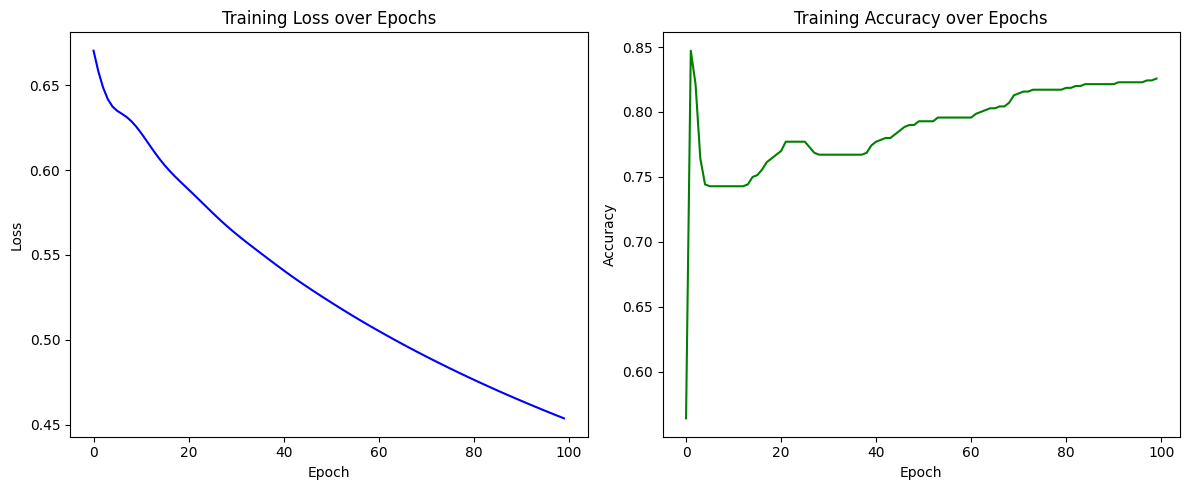

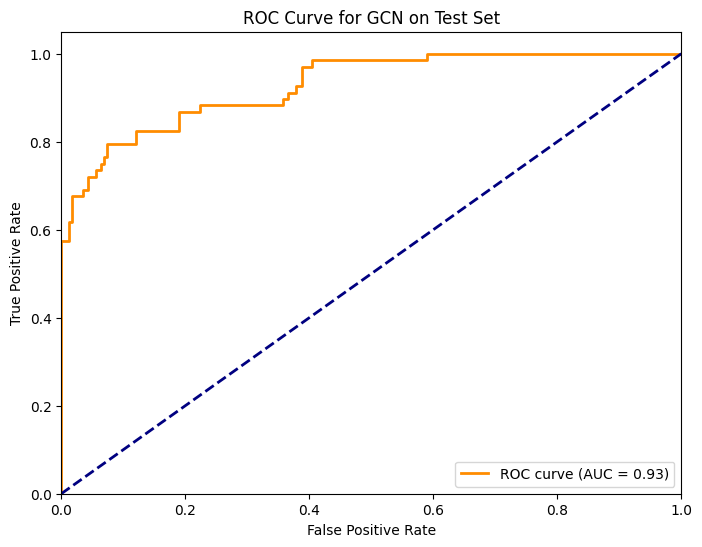

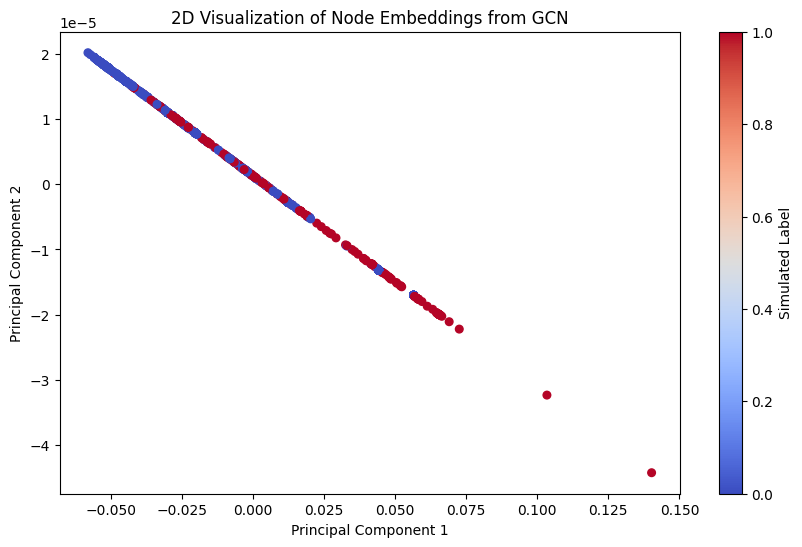

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the Notre Dame web graph dataset as a directed graph,
# then convert to undirected and use a subgraph for faster execution.
G = nx.read_edgelist("web-NotreDame.txt", create_using=nx.DiGraph(), nodetype=int, comments='#')
sub_nodes = list(G.nodes())[:1000]
G_sub = G.subgraph(sub_nodes).to_undirected()
print("Subgraph: Nodes =", G_sub.number_of_nodes(), "Edges =", G_sub.number_of_edges())

# Create a simple feature for each node using degree centrality.
deg_cent = nx.degree_centrality(G_sub)
features = np.array([[deg_cent[node]] for node in sub_nodes], dtype=np.float32)
X = torch.tensor(features)  # Feature matrix: shape [num_nodes, 1]

# Simulate binary labels: label 1 if degree centrality > median, else 0.
median_deg = np.median([deg_cent[node] for node in sub_nodes])
labels = np.array([1 if deg_cent[node] > median_deg else 0 for node in sub_nodes], dtype=np.int64)
y = torch.tensor(labels)

# Create the adjacency matrix and add self-loops.
A = nx.adjacency_matrix(G_sub, nodelist=sub_nodes).astype(np.float32)
A = A.todense()
A = np.array(A)
A = torch.tensor(A)

I = torch.eye(A.shape[0])
A_hat = A + I

# Compute the degree matrix and its inverse square root.
D_hat = torch.diag(torch.sum(A_hat, dim=1))
D_hat_inv_sqrt = torch.inverse(torch.sqrt(D_hat))

# Compute the normalized adjacency matrix: A_norm = D^(-1/2) * A_hat * D^(-1/2)
A_norm = torch.matmul(torch.matmul(D_hat_inv_sqrt, A_hat), D_hat_inv_sqrt)

# Split data into training and testing sets.
indices = np.arange(X.shape[0])
train_idx, test_idx = train_test_split(indices, test_size=0.3, random_state=42)
train_idx = torch.tensor(train_idx)
test_idx = torch.tensor(test_idx)

# Define a simple GCN layer.
class GCNLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, X, A_norm):
        out = torch.matmul(A_norm, X)
        out = self.linear(out)
        return out

# Define a simple 2-layer GCN model.
class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass):
        super(GCN, self).__init__()
        self.gcn1 = GCNLayer(nfeat, nhid)
        self.gcn2 = GCNLayer(nhid, nclass)
    def forward(self, X, A_norm):
        h = self.gcn1(X, A_norm)
        h = F.relu(h)
        h = self.gcn2(h, A_norm)
        return h

# Set model parameters.
nfeat = X.shape[1]  # 1 feature per node.
nhid = 16
nclass = 2

model = GCN(nfeat, nhid, nclass)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop.
num_epochs = 100
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X, A_norm)
    loss = criterion(output[train_idx], y[train_idx])
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Compute training accuracy.
    _, preds = torch.max(output[train_idx], 1)
    correct = (preds == y[train_idx]).sum().item()
    acc = correct / len(train_idx)
    train_accuracies.append(acc)

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Accuracy: {acc:.4f}")

# Evaluate on test set.
model.eval()
with torch.no_grad():
    output = model(X, A_norm)
    _, test_preds = torch.max(output[test_idx], 1)
    test_acc = accuracy_score(y[test_idx].numpy(), test_preds.numpy())
    print("Test Accuracy:", test_acc)

    # Compute ROC curve and AUC for test set (using probability for class 1).
    probs = F.softmax(output[test_idx], dim=1)[:, 1].numpy()
    fpr, tpr, thresholds = roc_curve(y[test_idx].numpy(), probs)
    roc_auc = auc(fpr, tpr)
    print("Test ROC AUC:", roc_auc)

# Plot training loss and accuracy curves.
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(train_losses, color='blue')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(train_accuracies, color='green')
plt.title("Training Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Plot ROC curve.
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for GCN on Test Set")
plt.legend(loc="lower right")
plt.show()

# Visualize the learned node embeddings using PCA.
model.eval()
with torch.no_grad():
    # Use the output from the hidden layer as node embeddings.
    h = model.gcn1(X, A_norm)
    h = F.relu(h)
    embeddings = h.numpy()
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)
plt.figure(figsize=(10,6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='coolwarm', s=30)
plt.title("2D Visualization of Node Embeddings from GCN")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Simulated Label")
plt.show()


### Observations & Explanations
- The GCN model is trained over 100 epochs, and training loss and accuracy are tracked. The loss decreases and accuracy improves over time.
- The test accuracy and ROC AUC provide insight into the model's generalization ability.
- The PCA visualization of node embeddings shows how the GCN clusters nodes with similar simulated labels, demonstrating its capability to learn meaningful representations from graph data.


### Quiz
1. What are the key steps involved in training a GCN?
2. How can evaluation metrics such as the ROC curve and accuracy be used to assess the performance of a GCN?


### Practical Activities
- **Activity 1:** Experiment with different values for the hidden layer size (`nhid`) and observe how the training loss and accuracy curves change.
- **Activity 2:** Modify the learning rate and number of epochs, then evaluate the impact on test accuracy and the ROC AUC.
- **Activity 3:** Replace the degree centrality feature with another graph metric (e.g., clustering coefficient) as the sole feature, retrain the GCN, and compare the results.


### Explanation/Feedback
The code above presents an end-to-end training and evaluation pipeline for a simple GCN using the Notre Dame web graph dataset. By preprocessing the graph, simulating binary labels, and building a normalized adjacency matrix, we construct a feature matrix for each node. The two-layer GCN is then trained, and its performance is evaluated using training loss, accuracy, and ROC analysis. The PCA visualization further illustrates the clustering of nodes based on learned embeddings. Experimenting with hyperparameters and feature choices will help deepen your understanding of GCN performance.


## Section 5: Applications and Future Directions of GNNs


### Objectives
- Explore real-world applications of Graph Neural Networks (GNNs) using the Notre Dame web graph.
- Discuss current challenges and future research directions in GNNs.


### Introduction
GNNs have been successfully applied in numerous domains including citation networks, molecular graphs, and social network analysis. In this section, we apply a trained Graph Convolutional Network (GCN) to a node classification task on a subgraph of the University of Notre Dame web graph. We then discuss the challenges faced by current GNN architectures—such as scalability, interpretability, and handling dynamic graphs—and outline potential future directions including advanced architectures and improved explainability.


### Key Points
- **Applications:**  
  - GNNs can be used for node classification, link prediction, and graph classification in real-world datasets.
  - In our example, the GCN model is applied for binary node classification based on degree centrality.
- **Challenges:**  
  - Scalability: Processing large graphs efficiently.
  - Interpretability: Understanding how GNNs make predictions.
  - Dynamic graphs: Adapting to evolving graph structures.
- **Future Directions:**  
  - Advanced architectures integrating multi-modal data.
  - Research on explainability and interpretability of GNN decisions.


### Code Examples
Below is the code that trains a simple GCN on a subgraph of the Notre Dame web graph for node classification, and then visualizes the predicted labels on the graph.


Subgraph: Nodes = 500 Edges = 1717
Epoch 10/50, Loss: 0.6698, Accuracy: 0.7600
Epoch 20/50, Loss: 0.6315, Accuracy: 0.7600
Epoch 30/50, Loss: 0.5966, Accuracy: 0.7800
Epoch 40/50, Loss: 0.5677, Accuracy: 0.7820
Epoch 50/50, Loss: 0.5438, Accuracy: 0.7820


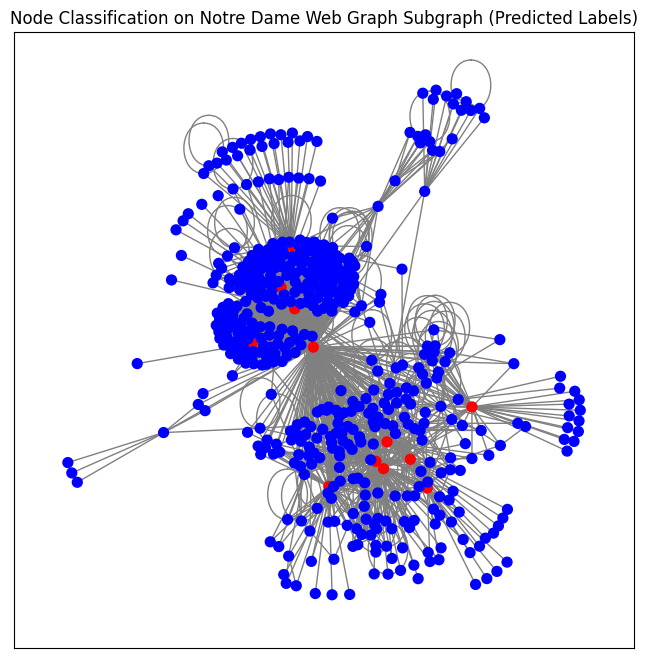

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load the Notre Dame web graph dataset as a directed graph,
# then convert to undirected and use a subgraph of 500 nodes for faster execution.
G = nx.read_edgelist("web-NotreDame.txt", create_using=nx.DiGraph(), nodetype=int, comments='#')
sub_nodes = list(G.nodes())[:500]
G_sub = G.subgraph(sub_nodes).to_undirected()
print("Subgraph: Nodes =", G_sub.number_of_nodes(), "Edges =", G_sub.number_of_edges())

# Create a simple feature for each node using degree centrality.
deg_cent = nx.degree_centrality(G_sub)
features = np.array([[deg_cent[node]] for node in sub_nodes], dtype=np.float32)
X = torch.tensor(features)  # Feature matrix: [num_nodes, 1]

# Simulate binary labels: label 1 if degree centrality > median, else 0.
median_deg = np.median([deg_cent[node] for node in sub_nodes])
labels = np.array([1 if deg_cent[node] > median_deg else 0 for node in sub_nodes], dtype=np.int64)
y = torch.tensor(labels)

# Build the adjacency matrix for the subgraph.
A = nx.adjacency_matrix(G_sub, nodelist=sub_nodes).astype(np.float32)
A = A.todense()
A = np.array(A)
A = torch.tensor(A)

# Add self-loops: A_hat = A + I.
I = torch.eye(A.shape[0])
A_hat = A + I

# Compute the degree matrix and its inverse square root.
D_hat = torch.diag(torch.sum(A_hat, dim=1))
D_hat_inv_sqrt = torch.inverse(torch.sqrt(D_hat))

# Compute the normalized adjacency matrix: A_norm = D^(-1/2) * A_hat * D^(-1/2).
A_norm = torch.matmul(torch.matmul(D_hat_inv_sqrt, A_hat), D_hat_inv_sqrt)

# Define a simple GCN layer.
class GCNLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, X, A_norm):
        out = torch.matmul(A_norm, X)
        out = self.linear(out)
        return out

# Define a simple 2-layer GCN model.
class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass):
        super(GCN, self).__init__()
        self.gcn1 = GCNLayer(nfeat, nhid)
        self.gcn2 = GCNLayer(nhid, nclass)
    def forward(self, X, A_norm):
        h = self.gcn1(X, A_norm)
        h = F.relu(h)
        h = self.gcn2(h, A_norm)
        return h

# Set model parameters.
nfeat = X.shape[1]  # 1 feature per node.
nhid = 16
nclass = 2
model = GCN(nfeat, nhid, nclass)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Train the GCN model for 50 epochs.
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X, A_norm)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        _, preds = torch.max(output, 1)
        acc = (preds == y).float().mean().item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

# Use the trained model to predict node labels.
model.eval()
with torch.no_grad():
    output = model(X, A_norm)
    _, predicted_labels = torch.max(output, 1)
predicted_labels = predicted_labels.numpy()

# Visualize the subgraph with predicted labels using NetworkX.
color_map = ['red' if label == 1 else 'blue' for label in predicted_labels]
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw_networkx(G_sub, pos, node_color=color_map, with_labels=False, node_size=50, edge_color='gray')
plt.title("Node Classification on Notre Dame Web Graph Subgraph (Predicted Labels)")
plt.show()


### Observations & Explanations
- The GCN model is trained on a subgraph of 500 nodes from the Notre Dame web graph using degree centrality as the sole node feature.
- The simulated binary labels, derived from the degree centrality median, enable a straightforward node classification task.
- Visualization of the subgraph shows nodes colored by their predicted labels, illustrating how the GCN has learned to separate nodes based on their structural properties.
- This example demonstrates the application of GNNs for node classification and highlights the potential for using such models in various real-world tasks.


### Quiz
1. What are some real-world applications of GNNs?  
2. What challenges do GNNs currently face, and what future directions can address these issues?


### Practical Activities
- **Activity 1:** Extend the node classification task by incorporating an additional feature (e.g., clustering coefficient) and retrain the GCN. Compare the performance metrics.
- **Activity 2:** Experiment with different GCN architectures (e.g., varying the number of layers or hidden units) and evaluate how these changes affect node classification accuracy.
- **Activity 3:** Develop a mini-project where you apply the GCN model to a different subset of the Notre Dame web graph and analyze the impact of graph sparsity on model performance.


### Explanation/Feedback
In this section, we demonstrated how to apply a simple GCN model to a real-world graph dataset (the Notre Dame web graph) for a node classification task. By using degree centrality as a feature, we simulated binary labels and trained the GCN, which then predicted node classes. The visualization of the subgraph with color-coded predicted labels provides insight into how the model captures graph structure. Additionally, the discussion of challenges (such as scalability and interpretability) and future directions (like advanced architectures and multi-modal integration) lays the groundwork for further exploration into GNNs.


## All Quiz Answers

**Section 1 Answers:**
1. A Graph Neural Network (GNN) is a neural network that operates on graph-structured data, leveraging the relationships between nodes to improve learning.
2. Graph structure allows GNNs to capture complex dependencies and relational information that traditional neural networks cannot.

**Section 2 Answers:**
1. Message passing in GNNs involves nodes exchanging information with their neighbors to update their features.
2. Iterative message passing enables nodes to incorporate information from increasingly distant neighbors, improving representation quality.

**Section 3 Answers:**
1. GCNs extend traditional convolutional operations to graphs by aggregating features from local neighborhoods.
2. Spectral approaches rely on graph Fourier transforms, while spatial approaches directly aggregate features from neighboring nodes.

**Section 4 Answers:**
1. Training a GCN involves data preprocessing, model training with a defined loss function, and evaluation using metrics like accuracy and loss curves.
2. Evaluation metrics such as training loss, validation accuracy, and ROC curves help assess the model’s performance and generalization ability.

**Section 5 Answers:**
1. GNNs are applied in citation networks, molecular graphs, social network analysis, and more.
2. Challenges include scalability, interpretability, and dynamic graph handling; future research may focus on advanced architectures and improved explainability.
